# Corona & Julia

*Dyre Haugen* May,5 2020

The Corona Pandemic arrived in Spain in February 2020. 
At that time I had just started looking into the Julia Programming Language.
I can only learn new languages by practice.
I needed some interested computation subject to test the capabilities of Julia.
Epidemics Modelling in Julia became an obvious choice.

Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) provides worldwide current data on the epidemic at https://github.com/CSSEGISandData/COVID-19 .
However, they discontinued the *recovered* time series. https://github.com/bumbeishvili/covid19-daily-data is an alternative source of data scraped from https://www.worldometers.info/coronavirus/ which is applied here.

In [13]:
# ~/znb/corona/corona.jl  -- downloaded from ~/znb/corona/corona.ipynb                                                         
# 200505 003                                                                                                                   

#=                                                                                                                             
We start out by getting the data running debian/linux bash shell:                                                              
$ clone https://github.com/bumbeishvili/covid19-daily-data                                                                     

# For later updating:
$ cd covid19-daily-data
$ git pull origin

# These are the files we get:                                                                                                 
$ ls covid19-daily-data                                                                                                        
misc  README.md  time_series_19-covid-Confirmed.csv  time_series_19-covid-Deaths.csv  time_series_19-covid-Recovered.csv       
                                                                                                                               
Now we can look into the time series of confirmed cases, running Julia:                                                        
=#


In [2]:
using CSV, DataFrames, Dates, Printf, Plots

df_cfm_src = CSV.read("covid19-daily-data/time_series_19-covid-Confirmed.csv")

,Province/State,Country/Region,Long,Lat,1/22/20,1/23/20
,String,String,Float64,Float64,Int64,Int64
1,Afghanistan,Afghanistan,65.0,33.0,0,0
2,Albania,Albania,20.1683,41.1533,0,0
3,Algeria,Algeria,1.6596,28.0339,0,0
4,Andorra,Andorra,1.5218,42.5063,0,0
5,Angola,Angola,17.8739,-11.2027,0,0
6,Antigua and Barbuda,Antigua and Barbuda,-61.7964,17.0608,0,0
7,Argentina,Argentina,-63.6167,-38.4161,0,0
8,Armenia,Armenia,45.0382,40.0691,0,0
9,Aruba,Aruba,-70.0358,12.5186,0,0


Julia only show us the upper left corner of the table. The time series start at January 22, 2020 (column 5). Every day a new column is added. I write this on April 22, so the last column in my table is '4/21/20'. The last country in the table is Zimbabwe in Row 193.

To work with country cases I would like to have the transposed table.
I have (so far) not found and easy way to transpose a dataframe.
I want to pick out a few countries of particular interest to me - collect their time series and put them into a new dataframe with countries as columns.

I start out by picking out the country names:

In [3]:
countries = df_cfm_src[:,2]

193-element WeakRefStrings.StringArray{String,1}:
 "Afghanistan"        
 "Albania"            
 "Algeria"            
 "Andorra"            
 "Angola"             
 "Antigua and Barbuda"
 "Argentina"          
 "Armenia"            
 "Aruba"              
 "Australia"          
 "Austria"            
 "Azerbaijan"         
 "Bahamas"            
 ⋮                    
 "UAE"                
 "UK"                 
 "USA"                
 "Uganda"             
 "Ukraine"            
 "Uruguay"            
 "Uzbekistan"         
 "Vatican City"       
 "Venezuela"          
 "Vietnam"            
 "Zambia"             
 "Zimbabwe"           

In [4]:
# Specify which countries to extract:
clist  = ["Argentina" "Belgium" "Brazil" "Norway" "Spain" "Sweden" "Thailand"]


1×7 Array{String,2}:
 "Argentina"  "Belgium"  "Brazil"  "Norway"  "Spain"  "Sweden"  "Thailand"

In [5]:
# Extracting the epidemic data:
cindx = Array{Int64}(undef, length(clist))
cfm   = zeros(size(df_cfm_src)[2]-4, length(clist)); # Data starts in column 4
for i in 1:length(clist)
    indx = findall(x->x==clist[i], df_cfm_src[:,2])  
    cfm[:,i] = convert(Array, df_cfm_src[indx,5:end])
end
df_cfm = DataFrame(cfm)
for i in 1:length(clist)
     rename!(df_cfm, names(df_cfm)[i] => Symbol(clist[i])); 
end                  
df_cfm


,Argentina,Belgium,Brazil,Norway,Spain,Sweden,Thailand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0,7.0
5,0.0,0.0,0.0,0.0,0.0,0.0,8.0
6,0.0,0.0,0.0,0.0,0.0,0.0,8.0
7,0.0,0.0,0.0,0.0,0.0,0.0,14.0
8,0.0,0.0,0.0,0.0,0.0,0.0,14.0
9,0.0,0.0,0.0,0.0,0.0,0.0,14.0


Now Julia does not seem to be happy with the Date Format like '1/22/20'.  I need to reformat the dates to YYYY-MM-DD.

In [6]:
# Converting the Dates:
colstring = Array{Union{Nothing, String}}(nothing, length(names(df_cfm_src))-4,2)
coldates  = Array{Date,length(names(df_cfm_src))-4}
for i in 1:length(names(df_cfm_src))-4 colstring[i,1] = String(names(df_cfm_src)[i+4])*"20" end #  adding 20 to get 2020  
colstring2=colstring
for i=1:length(colstring[:,1]) colstring2[i,1]=replace(colstring[i,1], "/" => "-") end
coldates=Date.(colstring2[:,1], Dates.DateFormat("mm-dd-yyyy"))
df_00 = DataFrame([coldates])
rename!(df_00, :x1 => :Date)

,Date
,Date
1,2020-01-22
2,2020-01-23
3,2020-01-24
4,2020-01-25
5,2020-01-26
6,2020-01-27
7,2020-01-28
8,2020-01-29
9,2020-01-30


In [7]:
# Joining Dates and Data:
df_cfm = hcat(df_00, df_cfm);
# The Epidemic takes hold for these countries from late March
# To show the last 20 rows we use
last(df_cfm, 20)

,Date,Argentina,Belgium,Brazil,Norway,Spain,Sweden,Thailand
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2020-04-15,2571.0,33573.0,28610.0,6797.0,180659.0,11927.0,2643.0
2,2020-04-16,2669.0,34809.0,30683.0,6905.0,184948.0,12540.0,2672.0
3,2020-04-17,2669.0,36138.0,33682.0,6937.0,190839.0,13216.0,2700.0
4,2020-04-18,2839.0,37183.0,36722.0,7036.0,194416.0,13822.0,2733.0
5,2020-04-19,2941.0,38496.0,38654.0,7078.0,198674.0,14385.0,2765.0
6,2020-04-20,3031.0,39983.0,40743.0,7156.0,200210.0,14777.0,2792.0
7,2020-04-21,3144.0,40956.0,43079.0,7241.0,204178.0,15322.0,2811.0
8,2020-04-22,3288.0,41889.0,45757.0,7338.0,208389.0,16004.0,2826.0
9,2020-04-23,3435.0,42797.0,49492.0,7401.0,213024.0,16755.0,2839.0


We now store this dataframe:

In [8]:
CSV.write("df_cfm.csv", df_cfm)

"df_cfm.csv"

To see what I have got so far I will plot the data - and save the figure:

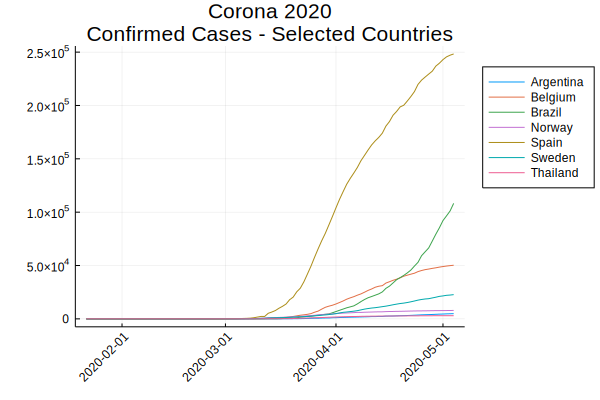

In [12]:
plot(df_cfm[:,1], cfm,
     label = clist,
     legend=:outertopright, xrotation=45,
     title = "Corona 2020\nConfirmed Cases - Selected Countries")


In [10]:
savefig("cfm_01.png") 